Data from: https://www.kaggle.com/datasets/jaganadhg/house-hold-energy-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/D202.csv")

In [3]:
df["DATE"] = pd.to_datetime(df['DATE'] + " " + df['END TIME'] + ":59", format="%m/%d/%Y %H:%M:%S")

In [4]:
df.set_index("DATE", inplace = True)

In [5]:
df.head()

,TYPE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
DATE,,,,,,,
2016-10-22 00:14:59,Electric usage,0:00,0:14,0.01,kWh,$0.00,NaN
2016-10-22 00:29:59,Electric usage,0:15,0:29,0.01,kWh,$0.00,NaN
2016-10-22 00:44:59,Electric usage,0:30,0:44,0.01,kWh,$0.00,NaN
2016-10-22 00:59:59,Electric usage,0:45,0:59,0.01,kWh,$0.00,NaN
2016-10-22 01:14:59,Electric usage,1:00,1:14,0.01,kWh,$0.00,NaN


In [6]:
hourly_usage = df["USAGE"].resample("h").sum()
hourly_usage.head()

DATE
2016-10-22 00:00:00    0.04
2016-10-22 01:00:00    0.04
2016-10-22 02:00:00    0.08
2016-10-22 03:00:00    0.04
2016-10-22 04:00:00    0.04
Freq: H, Name: USAGE, dtype: float64

In [7]:
daily_usage = df["USAGE"].resample("d").sum()
daily_usage.head()

DATE
2016-10-22     4.52
2016-10-23    23.32
2016-10-24     7.16
2016-10-25     8.68
2016-10-26     5.04
Freq: D, Name: USAGE, dtype: float64

In [8]:
weekly_sum = df["USAGE"].resample("w").sum()
weekly_sum.head()

DATE
2016-10-23    27.84
2016-10-30    48.92
2016-11-06    87.44
2016-11-13    66.76
2016-11-20    78.16
Freq: W-SUN, Name: USAGE, dtype: float64

In [9]:
weekly_avg = daily_usage.ewm(span=7).mean()
weekly_avg.head()

DATE
2016-10-22     4.520000
2016-10-23    15.262857
2016-10-24    11.758919
2016-10-25    10.632914
2016-10-26     8.799641
Freq: D, Name: USAGE, dtype: float64

In [10]:
monthly_avg = daily_usage.ewm(span=30).mean()
monthly_avg.head()

DATE
2016-10-22     4.520000
2016-10-23    14.233333
2016-10-24    11.716683
2016-10-25    10.879966
2016-10-26     9.551232
Freq: D, Name: USAGE, dtype: float64

In [11]:
qtr_avg = daily_usage.ewm(span=90).mean()
qtr_avg.head()

DATE
2016-10-22     4.520000
2016-10-23    14.024444
2016-10-24    11.685262
2016-10-25    10.908719
2016-10-26     9.682236
Freq: D, Name: USAGE, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70368 entries, 2016-10-22 00:14:59 to 2018-10-24 23:59:59
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  object 
 1   START TIME  70368 non-null  object 
 2   END TIME    70368 non-null  object 
 3   USAGE       70368 non-null  float64
 4   UNITS       70368 non-null  object 
 5   COST        70368 non-null  object 
 6   NOTES       0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 4.3+ MB


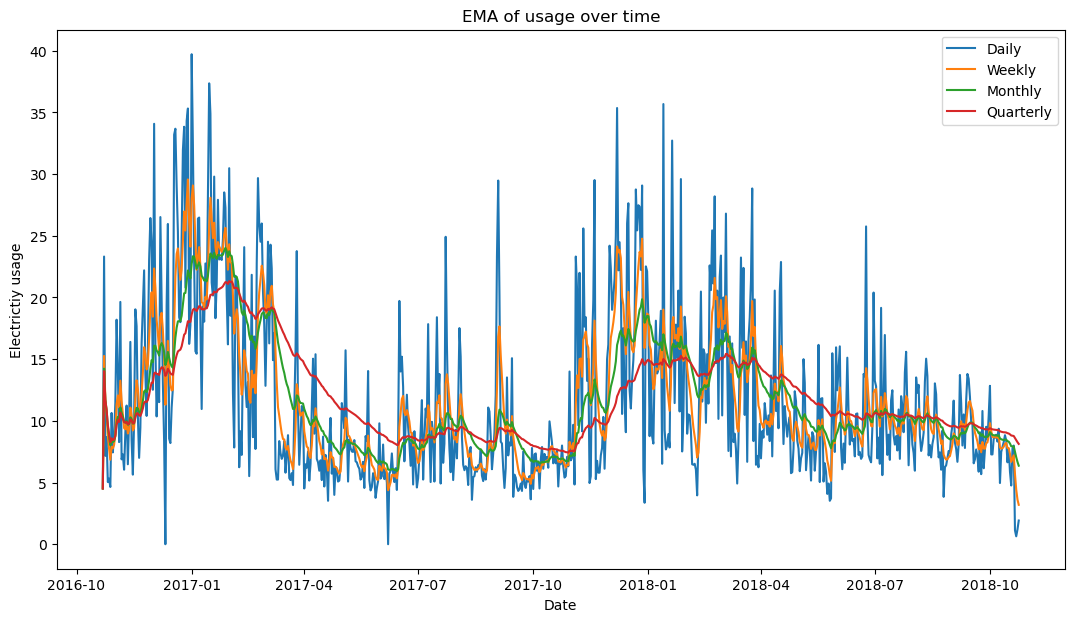

In [13]:
#Plot the exponential moving averages to see effects
plt.figure(figsize=(13, 7))
plt.plot(daily_usage, label='Daily')
plt.plot(weekly_avg, label='Weekly')
plt.plot(monthly_avg, label='Monthly')
plt.plot(qtr_avg, label='Quarterly')
plt.xlabel('Date')
plt.ylabel('Electrictiy usage')
plt.title('EMA of usage over time')
plt.legend()
plt.show()

In [14]:
#Compute exponential weighted standard deviation
monthly_std = daily_usage.ewm(span=30).std()
monthly_std.head()

DATE
2016-10-22          NaN
2016-10-23    13.293607
2016-10-24    10.131216
2016-10-25     8.281375
2016-10-26     7.562671
Freq: D, Name: USAGE, dtype: float64

In [15]:
#Compute upper and lower bands
upper_band = monthly_avg + monthly_std * 1.5
lower_band = monthly_avg - monthly_std * 1.5

In [16]:
#Final dataframe
final_df = pd.concat([daily_usage, monthly_avg, upper_band, lower_band], axis=1)
final_df.head()

,USAGE,USAGE,USAGE,USAGE
DATE,,,,
2016-10-22,4.52,4.520000,NaN,NaN
2016-10-23,23.32,14.233333,34.173745,-5.707078
2016-10-24,7.16,11.716683,26.913507,-3.480142
2016-10-25,8.68,10.879966,23.302028,-1.542096
2016-10-26,5.04,9.551232,20.895239,-1.792775


In [17]:
final_df.columns = ["usage", "midband", "upper_band", "lower_band"]
final_df.head()

,usage,midband,upper_band,lower_band
DATE,,,,
2016-10-22,4.52,4.520000,NaN,NaN
2016-10-23,23.32,14.233333,34.173745,-5.707078
2016-10-24,7.16,11.716683,26.913507,-3.480142
2016-10-25,8.68,10.879966,23.302028,-1.542096
2016-10-26,5.04,9.551232,20.895239,-1.792775


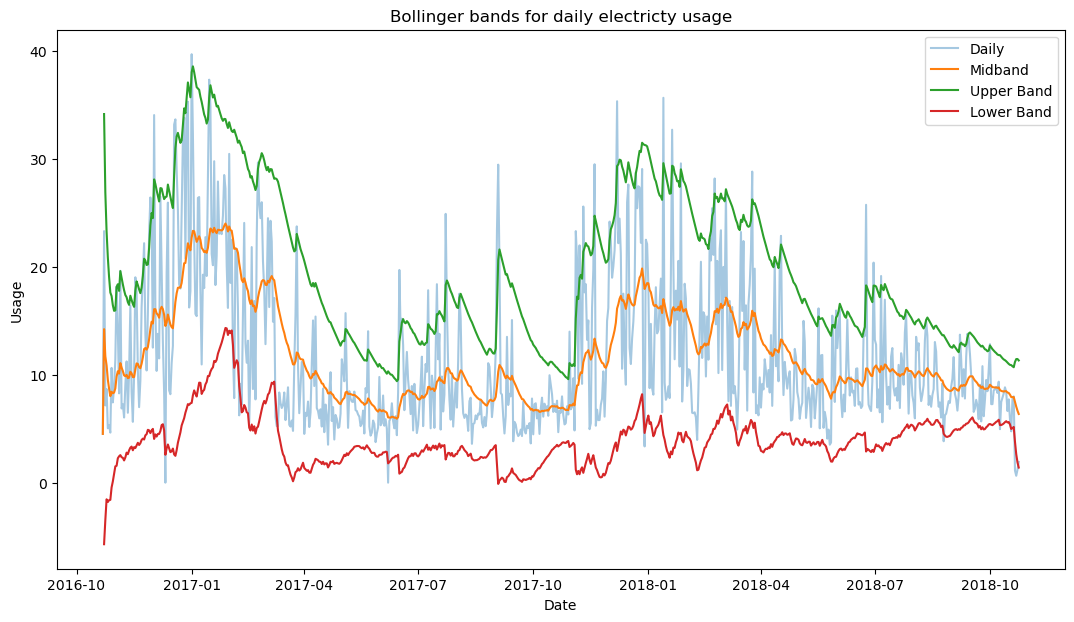

In [18]:
#Plot the bands
plt.figure(figsize=(13,7))
plt.plot(final_df["usage"], label="Daily", alpha = 0.4)
plt.plot(final_df["midband"], label="Midband")
plt.plot(final_df["upper_band"], label="Upper Band")
plt.plot(final_df["lower_band"], label="Lower Band")
plt.xlabel("Date")
plt.ylabel("Usage")
plt.title("Bollinger bands for daily electricty usage")
plt.legend()
plt.show()